In [1]:
!pip install seaborn
!pip install seaborn --upgrade
!pip install numpy
!pip install scikit-learn
!pip install pandas
!pip install formulaic
!pip install gapminder

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 1.7 MB/s eta 0:00:002.4 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 2.3 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.8/301.8 kB 1.7 MB/s eta 0:00:000:00:01m eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.2/94.2 kB 1.1 MB/s eta 0:00:000:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 1.1 MB/s eta 0:00:003.2 MB/s eta 0:00:01


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.decomposition import PCA
from sklearn.datasets import make_blobs
from sklearn.neighbors import NearestNeighbors

from formulaic import Formula, model_matrix
from gapminder import gapminder

In [196]:
penguins = sns.load_dataset('penguins')
penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [217]:
data_impo = data[[col for col in data.columns if col.startswith("IMPO")]]

In [225]:
penguins.dropna().reset_index().rename(lambda x: "penguins_" + x, axis = "columns").drop("penguins_index", axis = 1)

,penguins_species,penguins_island,penguins_bill_length_mm,penguins_bill_depth_mm,penguins_flipper_length_mm,penguins_body_mass_g,penguins_sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male
...,...,...,...,...,...,...,...
328,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,Female
329,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,Female
330,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,Male
331,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,Female


In [244]:
tips = sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [275]:
tips_sum = tips.groupby(["day", "time"])["tip"].sum().reset_index()
colores = {"Lunch":"orange", "Dinner":"blue"}
tips_sum

/tmp/ipykernel_9027/1872717590.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  tips_sum = tips.groupby(["day", "time"])["tip"].sum().reset_index()


,day,time,tip
0,Thur,Lunch,168.83
1,Thur,Dinner,3.00
2,Fri,Lunch,16.68
3,Fri,Dinner,35.28
4,Sat,Lunch,0.00
5,Sat,Dinner,260.40
6,Sun,Lunch,0.00
7,Sun,Dinner,247.39


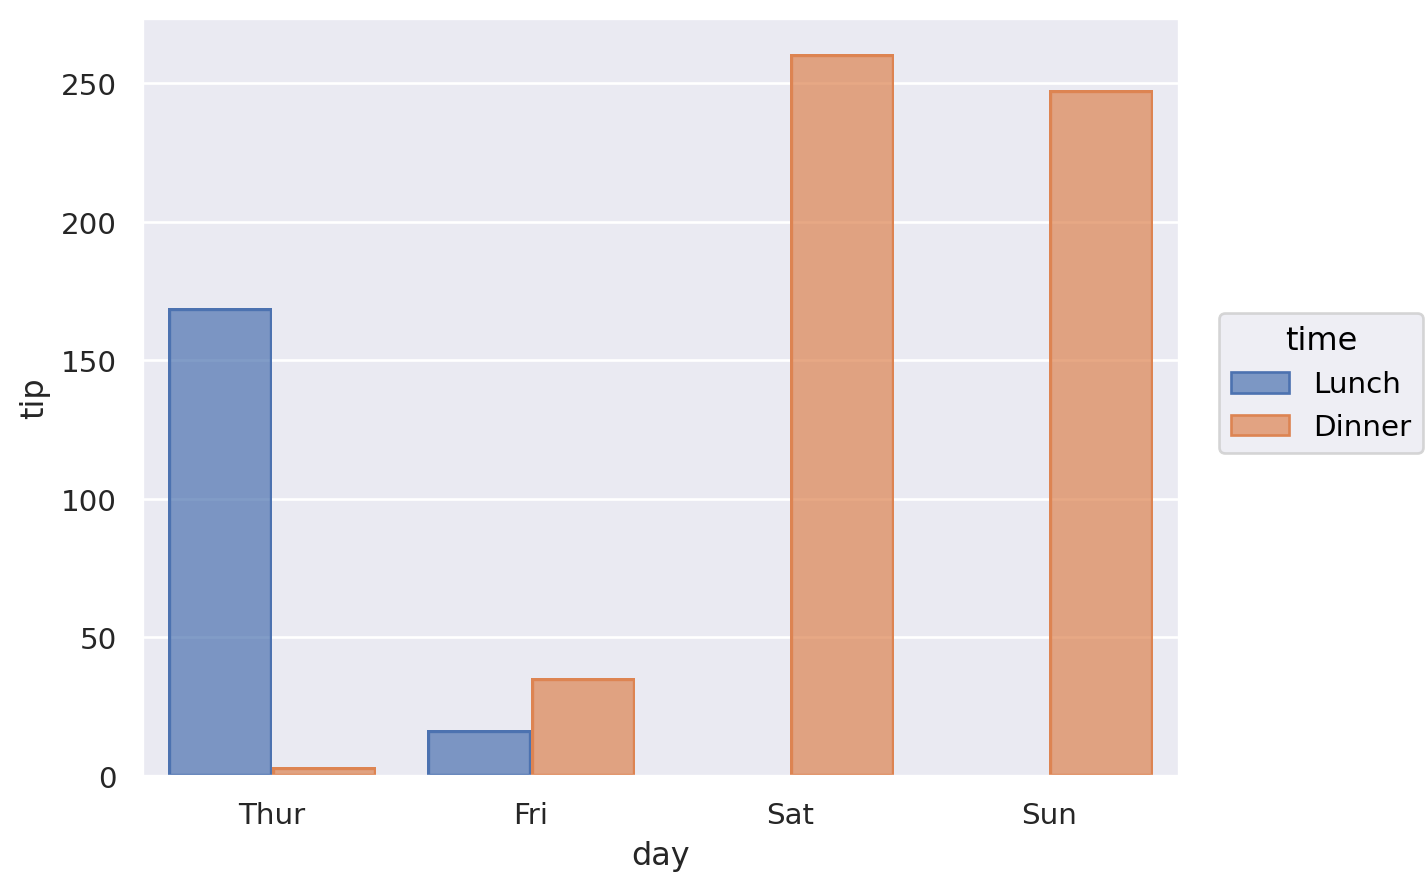

In [274]:
(
    so.Plot(data = tips_sum, x = "day", y = "tip", color = "time")
    .add(so.Bar(), so.Dodge())
)

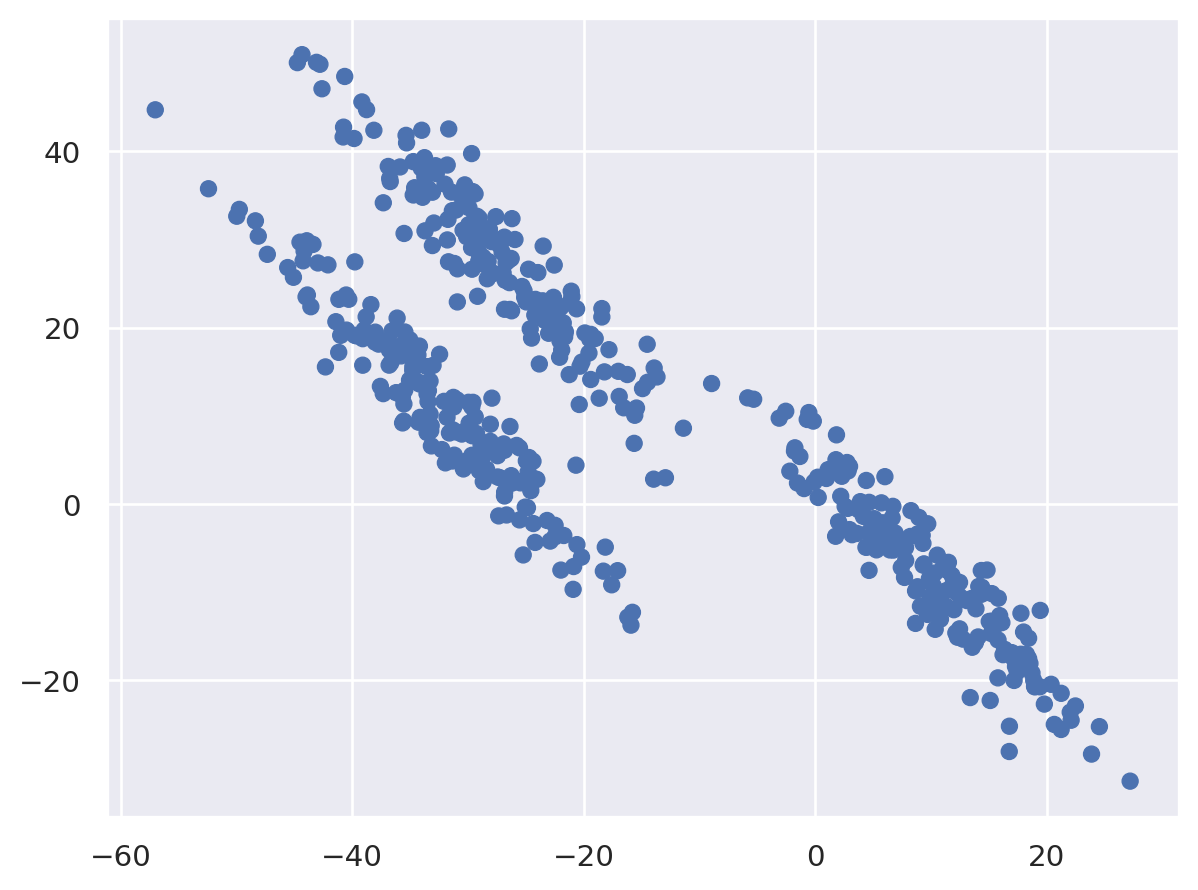

In [77]:
X, y = make_blobs(n_samples=500, random_state=170)
transformation = [[6., -6.], [-4., 8.]]
X_aniso = np.dot(X, transformation)

so.Plot(x = X_aniso[:,0], y = X_aniso[:,1]).add(so.Dot())

In [96]:
dbscan = DBSCAN(eps = 5, min_samples = 5)
etiquetas = dbscan.fit_predict(X_aniso)
etiquetas

array([ 0,  0,  1,  0,  2,  1,  0,  1,  2,  2,  1,  2,  0,  2,  1,  0,  1,
        0,  0,  1,  0,  1,  2,  1,  1,  1,  0,  1,  1,  0,  2,  0,  0,  1,
        1,  2,  1,  1,  1,  2,  1,  1,  0,  2,  2,  0,  2,  0,  0,  0,  0,
        1,  2,  1,  0,  2,  0,  0,  2,  0,  2,  0,  0,  1,  1,  2,  0,  0,
        1,  1,  1,  2,  0,  2,  0,  1,  0,  0,  1,  0,  2,  1,  0,  1,  0,
        0,  0,  0,  0,  1,  2,  1,  2,  2,  2,  1,  2,  2,  2,  1,  2,  0,
        0,  0,  0,  2,  0,  1,  1,  1,  1,  0,  0,  0,  1,  2,  0,  1,  2,
        2,  2,  1,  1,  1,  2,  2,  1,  0,  0,  1,  2,  1,  0,  1,  0,  2,
        2,  0,  2,  0,  1,  0,  2,  1,  1,  1,  0,  2,  2,  1,  0,  1,  2,
        2,  0,  2,  2,  2,  0,  0,  1,  2,  1,  2,  0,  0,  2,  1,  0,  2,
        1,  0,  1,  0,  0,  2,  2,  2,  0,  1,  2,  2,  0,  1,  1,  1,  1,
        1,  0,  2,  1,  2,  2,  1,  2,  1,  2,  2,  1,  1,  2,  2,  2,  2,
        0,  2,  2,  0,  1,  1,  2,  1,  1,  0,  0,  2,  2,  2,  2,  1,  1,
        1,  2,  0,  1,  1

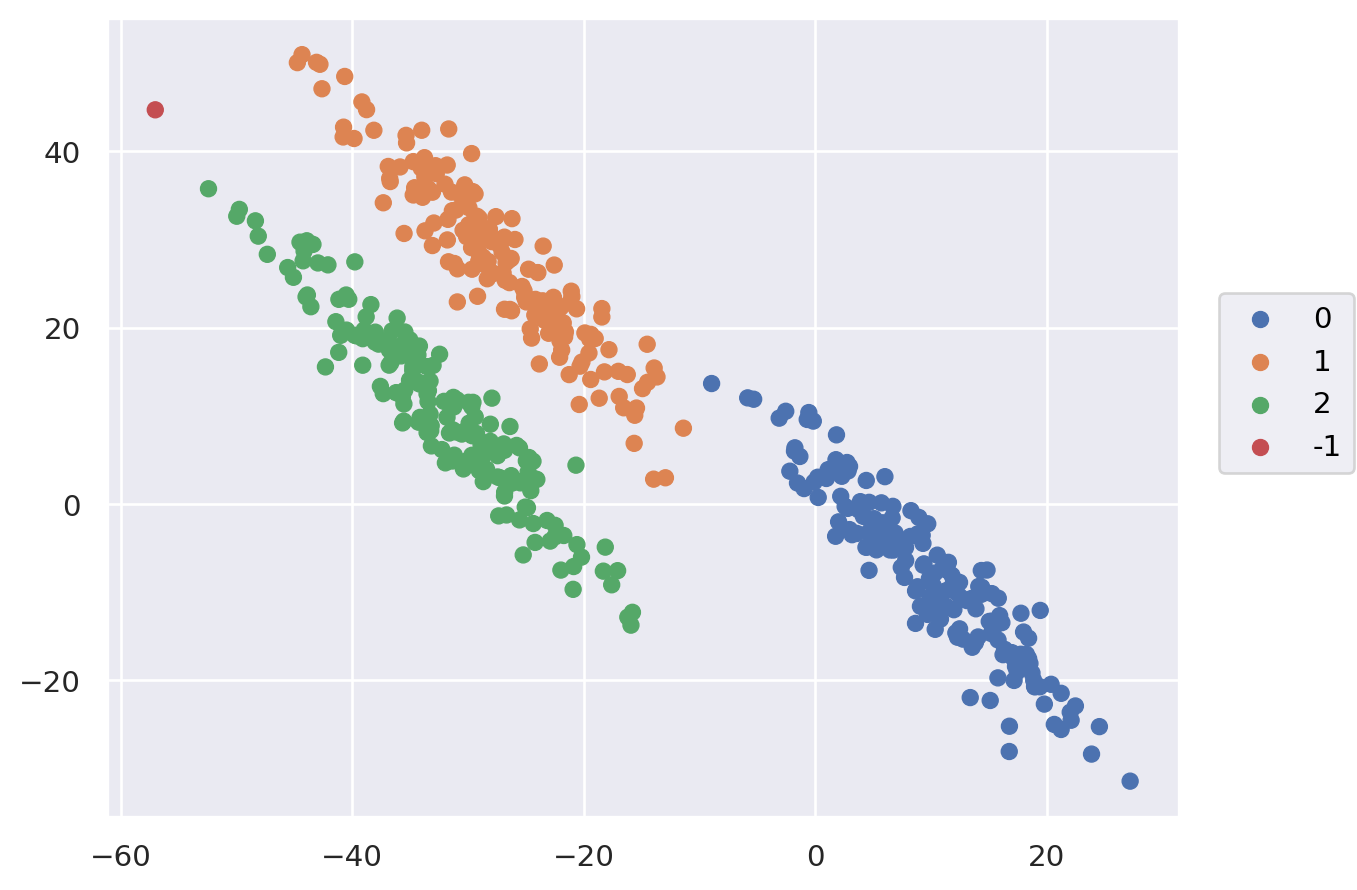

In [99]:
(
    so.Plot(x = X_aniso[:,0], y = X_aniso[:,1])
    .add(so.Dot(), color = etiquetas.astype(str))
)

In [104]:
np.count_nonzero(etiquetas == -1)


1

In [109]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [110]:
scaler0_5= MinMaxScaler(feature_range = (0, 5))

In [127]:
data = [[-1, 2], [-0.5, 6], [0, 10],[0,12], [1, 18]]
tips_numeric = tips.select_dtypes(include=['float64'])
tips_numeric["tip"] = scaler0_5.fit_transform(tips_numeric[["tip"]])

In [156]:
tips_numeric

,total_bill,tip
0,16.99,1.01
1,10.34,1.66
2,21.01,3.50
3,23.68,3.31
4,24.59,3.61
...,...,...
239,29.03,5.92
240,27.18,2.00
241,22.67,2.00
242,17.82,1.75


In [132]:
def scaler_to_05(df):
    scaler0_5= MinMaxScaler(feature_range = (0, 5))
    for col in df.columns:
        df[col] = scaler0_5.fit_transform(df[[col]])

In [165]:
tips["client_bill"] = tips["total_bill"]/tips["size"]
tips["lt_10"] = (tips["client_bill"] < 10).astype(int)
tips

,total_bill,tip,sex,smoker,day,time,size,client_bill,lt_10
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000,1
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667,1
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333,1
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000,0
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500,1
...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.676667,1
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000,0
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000,0
242,17.82,1.75,Male,No,Sat,Dinner,2,8.910000,1


In [184]:
promedio = tips.groupby("day")["total_bill"].mean()
display(promedio)
promedio_dict = {"Thur":17.682742, "Fri":17.151579, "Sat":20.441379, "Sun":21.410000}
#Thur, Fri, Sat, Sun

/tmp/ipykernel_9027/1743009613.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  promedio = tips.groupby("day")["total_bill"].mean()


day
Thur    17.682742
Fri     17.151579
Sat     20.441379
Sun     21.410000
Name: total_bill, dtype: float64

In [185]:
tips.replace({"day_avg":promedio_dict})

/tmp/ipykernel_9027/1560676264.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  tips.replace({"day_avg":promedio_dict})
/tmp/ipykernel_9027/1560676264.py:1: FutureWarning: The behavior of Series.replace (and DataFrame.replace) with CategoricalDtype is deprecated. In a future version, replace will only be used for cases that preserve the categories. To change the categories, use ser.cat.rename_categories instead.
  tips.replace({"day_avg":promedio_dict})


,total_bill,tip,sex,smoker,day,time,size,client_bill,lt_10,day_avg
0,16.99,1.01,Female,No,Sun,Dinner,2,8.495000,1,21.410000
1,10.34,1.66,Male,No,Sun,Dinner,3,3.446667,1,21.410000
2,21.01,3.50,Male,No,Sun,Dinner,3,7.003333,1,21.410000
3,23.68,3.31,Male,No,Sun,Dinner,2,11.840000,0,21.410000
4,24.59,3.61,Female,No,Sun,Dinner,4,6.147500,1,21.410000
...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3,9.676667,1,20.441379
240,27.18,2.00,Female,Yes,Sat,Dinner,2,13.590000,0,20.441379
241,22.67,2.00,Male,Yes,Sat,Dinner,2,11.335000,0,20.441379
242,17.82,1.75,Male,No,Sat,Dinner,2,8.910000,1,20.441379


In [188]:
gapminder1997 = gapminder[gapminder["year"] == 1997]
gapminder1997

,country,continent,year,lifeExp,pop,gdpPercap
9,Afghanistan,Asia,1997,41.763,22227415,635.341351
21,Albania,Europe,1997,72.950,3428038,3193.054604
33,Algeria,Africa,1997,69.152,29072015,4797.295051
45,Angola,Africa,1997,40.963,9875024,2277.140884
57,Argentina,Americas,1997,73.275,36203463,10967.281950
...,...,...,...,...,...,...
1653,Vietnam,Asia,1997,70.672,76048996,1385.896769
1665,West Bank and Gaza,Asia,1997,71.096,2826046,7110.667619
1677,"Yemen, Rep.",Asia,1997,58.020,15826497,2117.484526
1689,Zambia,Africa,1997,40.238,9417789,1071.353818


In [194]:
GDP = gapminder1997["gdpPercap"]*gapminder1997["pop"]

In [195]:
GDP.median()

37473838314.64542

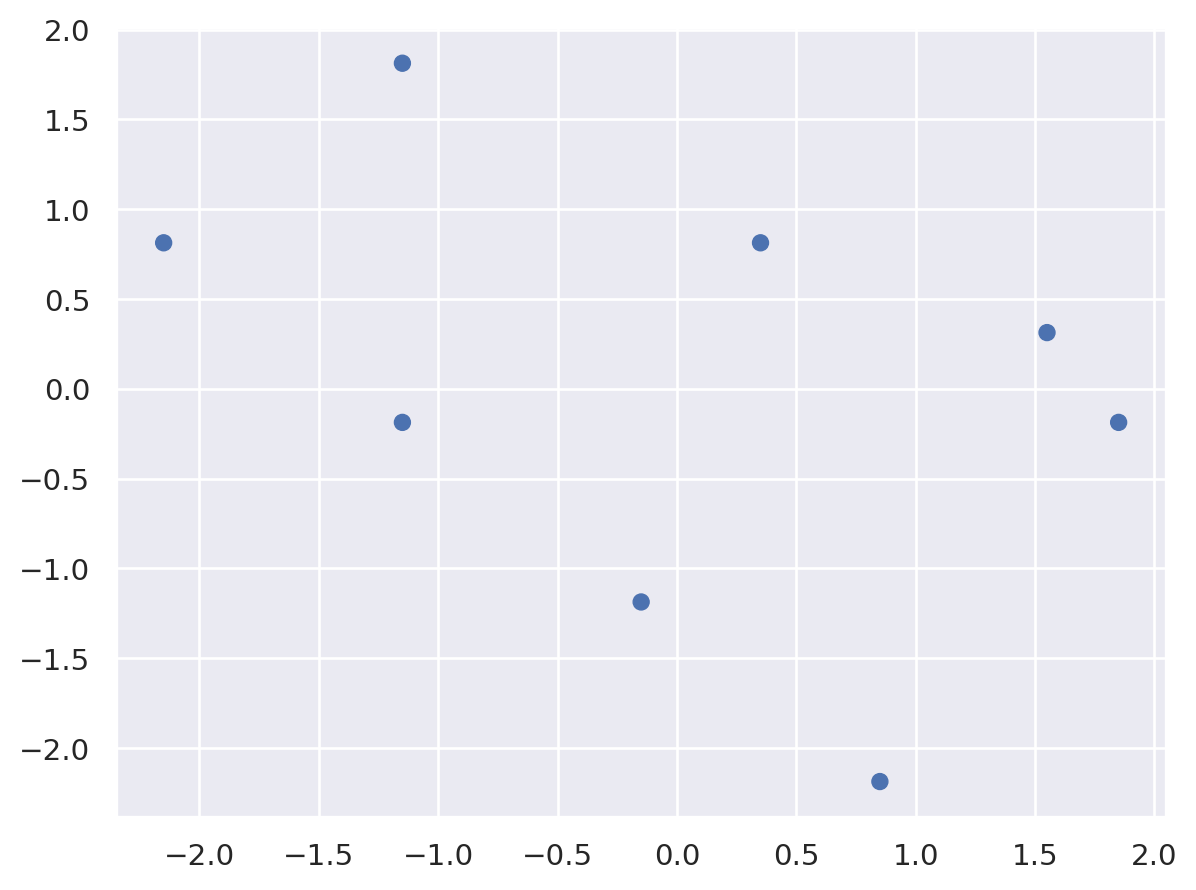

In [226]:
X = np.array([[1, 2], [2, -1], [3, -2], [4, 0], [2.5, 1], [3.7, 0.5], [1,0], [0,1]])
X_star = X - X.mean(axis = 0)
(
 so.Plot()
 .add(so.Dot(), x = X_star[:,0], y = X_star[:,1])
)

In [241]:
pca = PCA(n_components = 0.9)
pca.fit_transform(X_star)

array([[-2.00217544,  0.77391844],
       [ 0.58526569, -1.04408828],
       [ 1.98384348, -1.25380273],
       [ 1.59912627,  0.94892119],
       [-0.20152459,  0.86141981],
       [ 1.0606666 ,  1.17266475],
       [-0.81331211, -0.83437382],
       [-2.2118899 , -0.62465936]])

In [232]:
X_star

array([[-1.15  ,  1.8125],
       [-0.15  , -1.1875],
       [ 0.85  , -2.1875],
       [ 1.85  , -0.1875],
       [ 0.35  ,  0.8125],
       [ 1.55  ,  0.3125],
       [-1.15  , -0.1875],
       [-2.15  ,  0.8125]])

In [239]:
pca.components_

array([[ 0.80414613, -0.59443167]])

# Respuestas:

In [279]:
# 1- Winkinson: C:-Contempla la interacción de W con las demás variables explicativas
# 2- IMPO: data_impo = data[[col for col in data.columns if col.startswith("IMPO")]]
# 3- Modelos NO lineales: B), C) y E)
# 4- Comparar medianas: Verdadero
# 5- Mínimo global: Verdadero
# 6- KNN: Falso
# 7- pingüinos_: penguins.dropna().reset_index().rename(lambda x: "penguins_" + x, axis = "columns").drop("penguins_index", axis = 1)
# 8- Aprendizaje supervisado: KNN
# 9- 90% Var: 2 Componentes
# 10- PCA: b. u_1 = (0.80, -0.59), z_1 = (-2.0, 0.59, 1.98, 1.60, -0.2, 1.06, -0.81, -2.21) 
# 11- b. La cantidad de épocas para el entrenamiento es satisfactoria 
# 12- Replicar gráfico:
"""
tips_sum = tips.groupby(["day", "time"])["tip"].sum().reset_index()

(
    so.Plot(data = tips_sum, x = "day", y = "tip", color = "time")
    .add(so.Bar(), so.Dodge())
)
"""
#13- Escalar correctamente:
"""
X_train, X_test = train_test_split(X, test_size = 0.2)
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
"""
# 14- DBSCAN:
"""
# Primera tarea

dbscan = DBSCAN(eps = 5, min_samples = 5)
etiquetas = dbscan.fit_predict(X_aniso)
etiquetas

# Segunda tarea

(
    so.Plot(x = X_aniso[:,0], y = X_aniso[:,1])
    .add(so.Dot(), color = etiquetas.astype(str))
)

# Tercera tarea

np.count_nonzero(etiquetas == -1)
"""
# 15- Galaxy boxplot: Outliers continuos y hasta 25
# 16- Scaler 0-5: 
"""
def scaler_to_05(df):
    scaler0_5= MinMaxScaler(feature_range = (0, 5))
    for col in df.columns:
        df[col] = scaler0_5.fit_transform(df[[col]])

scaler_to_05(data)
"""
# 17- Modificar tips:
"""
tips["client_bill"] = tips["total_bill"]/tips["size"]
tips["lt_10"] = (tips["client_bill"] < 10).astype(int)
tips
"""
# 18- DNI: Aumenta ECM en ambos casos
# 19- DBSCAN Válido: Ambos
# 20- Tips replace:
"""
# Calculo promedio por día

promedio = tips.groupby("day")["total_bill"].mean()

# Armo un diccionario con los promedios

promedio_dict = {"Thur":17.682742, "Fri":17.151579, "Sat":20.441379, "Sun":21.410000}

# Creo columna y reemplazo

tips["day_avg"] = tips["day"]

tips.replace({"day_avg":promedio_dict})
"""
# 21- Sigmoidea: Binary
# 22- LeaveOneOut: True
# 23- Gráfico de alphas: A, creciente y correspondiente
# 24- Mediana 1997:
"""
gapminder1997 = gapminder[gapminder["year"] == 1997]

GDP = gapminder1997["gdpPercap"]*gapminder1997["pop"]

GDP.median()

# La mediana vale 37473838314.64542
"""
#